In [ ]:
# !pip install Wordcloud
# !pip install Sastrawi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud, STOPWORDS

In [ ]:
data = pd.read_csv('../data/mobil_listrik.csv')
data.head()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


## 1. Data Understanding

In [ ]:
data.dtypes

id_komentar      object
nama_akun        object
tanggal          object
text_cleaning    object
sentimen         object
dtype: object

In [ ]:
data.shape

(1517, 5)

In [ ]:
data = data.dropna()
data.isnull().sum()

id_komentar      0
nama_akun        0
tanggal          0
text_cleaning    0
sentimen         0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
count,1514,1514,1514,1514,1514
unique,1514,1513,1511,1513,3
top,Ugzbll5eyrIy3-gdUUJ4AaABAg,Albert,2023-06-06 14:02:09+00:00,mahal,negatif
freq,1,2,2,2,868


## 2. Preprocessing Teks

In [ ]:
data.head()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


In [ ]:
data = data.drop(columns='id_komentar')
data.head()

,nama_akun,tanggal,text_cleaning,sentimen
0,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


In [ ]:
# mengubah teks menjadi lower
data['text_cleaning'] = data['text_cleaning'].str.lower()
data.head()

,nama_akun,tanggal,text_cleaning,sentimen
0,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


In [ ]:
# Normalisasi
norm = {" dgn " : " dengan ", " gue ": " saya ", " ngaco ": " sembarangan ", " kwalitas ":" kualitas ", ' blom ':' belum ', ' aing ': ' aku ', ' tehnologi ':' teknologi ', ' jd ':' jadi ', ' dg ':' dengan ', ' kudu ':' harus ', ' jk ':' jika ', ' problem ':' masalah ', ' iru ':' itu ', ' duit ':' uang ', ' duid ':' uang ', ' bgsd ':' bangsat ', ' jt ':' juta ', ' stop ':' berhenti ', ' ngeri ':' seram ', ' turu ':' tidur ', ' early ':' awal ', ' pertamna ':' pertamina ', ' yg ':' yang ', ' mnurut ':' menurut ', ' trus ':' terus ', ' msh ':' masih ', ' simple ':' mudah ', ' worth ':' layak ', 'problem ':' masalah ', ' hny ':' hanya ', ' dn ':' dan ', ' jln ':' jalan '  }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

data['text_cleaning'] = data['text_cleaning'].apply(lambda x: normalisasi(x))

In [ ]:
# Stopword
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_word = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

data['text_cleaning'] = data['text_cleaning'].apply(lambda x: stopword(x))
data.head()

,nama_akun,tanggal,text_cleaning,sentimen
0,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,lushen ace,2023-08-04 12:16:23+00:00,masalah subsidi kualitas diturunin harga dina...,negatif
2,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,yp office,2023-08-04 08:29:54+00:00,model jelek kualitas buruk harga mahal croot,negatif
4,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat sembarangan woy anak muda punya rum...,negatif


In [ ]:
# Tokenisasi
tokenized = data['text_cleaning'].apply(lambda x:x.split())
tokenized

0       [saran, sih, bikin, harga, ionic, sama, kayak,...
1       [masalah, subsidi, kualitas, diturunin, harga,...
2       [baik, kualitas, kembang, dulu, baik, kualitas...
3       [model, jelek, kualitas, buruk, harga, mahal, ...
4       [syarat, sembarangan, woy, anak, muda, punya, ...
                              ...                        
1512    [apa, kabar, padahal, negri, luar, biasa, negara]
1513    [antar, anak, sekolah, antar, bantu, pasar, kl...
1514                               [esemka, bangga, solo]
1515    [cerdas, orang, pasar, jalan, x, da, gimana, k...
1516    [niat, beli, ev, murah, malah, ikut, dinaikin,...
Name: text_cleaning, Length: 1514, dtype: object

In [ ]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Colab /Youtube/NAIVE BAYES CLASSIFIER/data/mobil_listrik_bersih1.csv', index=False)
data_clean = pd.read_csv('/content/drive/MyDrive/Colab /Youtube/NAIVE BAYES CLASSIFIER/data/mobil_listrik_bersih1.csv', encoding='latin1')

saran sih bikin harga ionic sama kayak brio insya alloh laris manis
masalah subsidi kualitas diturunin harga dinaikin usaha gitu cari cuan subsidi inflasi paling gede
baik kualitas kembang dulu baik kualitas motor motor pabrikan jepang
model jelek kualitas buruk harga mahal croot
syarat sembarang woy anak muda punya rumah jadi umkm bukan kur dapet sembarang sia deui sia deui nu narima subsidi teh ari aku iraha
harga motor mahal masa harga mirip motor beat kualitas bagai langit bumi
mol keren yah berita plus padahal mol lokal merk batrenya juta garansi tahun anggap batre awet tahun rakyat indonesia per tahun sekali keluar juta buat beli batre baru o saran uang subsidi keluar buat batre perintah punya wewenang pertamina kelola contoh gas kg gas kg gas kg produk baru misal batre v batre v batre v cabut bayar pasang gas pnp pom sistem swap batre banyak titik swap point indonesia luas
proses kenal produk baru butuh waktu ganti kendara bbm jadi kendara butuh waktu teknologi baru sabar
subsid

In [ ]:
data_clean.head()

,text_cleaning
0,saran sih bikin harga ionic sama kayak brio in...
1,masalah subsidi kualitas diturunin harga dinai...
2,baik kualitas kembang dulu baik kualitas motor...
3,model jelek kualitas buruk harga mahal croot
4,syarat sembarang woy anak muda punya rumah jad...


In [ ]:
at1 = pd.read_csv('/content/drive/MyDrive/Colab /Youtube/NAIVE BAYES CLASSIFIER/data/mobil_listrik_bersih1.csv')
at2 = pd.read_csv('/content/drive/MyDrive/Colab /Youtube/NAIVE BAYES CLASSIFIER/data/mobil_listrik.csv')
att2 = at2['sentimen']

data_clean = pd.concat([at1, att2], axis=1)
data_clean

,text_cleaning,sentimen
0,saran sih bikin harga ionic sama kayak brio in...,positif
1,masalah subsidi kualitas diturunin harga dinai...,negatif
2,baik kualitas kembang dulu baik kualitas motor...,positif
3,model jelek kualitas buruk harga mahal croot,negatif
4,syarat sembarang woy anak muda punya rumah jad...,negatif
...,...,...
1512,cerdas orang pasar jalan x da gimana kota ngec...,negatif
1513,niat beli ev murah malah ikut dinaikin sama pe...,negatif
1514,NaN,positif
1515,NaN,netral


In [ ]:
# Menghapus baris dengan nilai teks yang hilang (np.nan)
data_clean = data_clean.dropna()

In [ ]:
data_clean = data_clean[data_clean['sentimen'] != 'netral']
data_clean

,text_cleaning,sentimen
0,saran sih bikin harga ionic sama kayak brio in...,positif
1,masalah subsidi kualitas diturunin harga dinai...,negatif
2,baik kualitas kembang dulu baik kualitas motor...,positif
3,model jelek kualitas buruk harga mahal croot,negatif
4,syarat sembarang woy anak muda punya rumah jad...,negatif
...,...,...
1509,apa kabar padahal negri luar biasa negara,negatif
1510,antar anak sekolah antar bantu pasar klw jauh ...,positif
1511,esemka bangga solo,positif
1512,cerdas orang pasar jalan x da gimana kota ngec...,negatif


In [ ]:
data_clean = data_clean.replace({'positif':1, 'negatif':0})
data_clean.head()

,text_cleaning,sentimen
0,saran sih bikin harga ionic sama kayak brio in...,1
1,masalah subsidi kualitas diturunin harga dinai...,0
2,baik kualitas kembang dulu baik kualitas motor...,1
3,model jelek kualitas buruk harga mahal croot,0
4,syarat sembarang woy anak muda punya rumah jad...,0


## 3. Visualisasi Kata

In [ ]:
data_negatif = data_clean[data_clean['sentimen'] == 0]
data_positif = data_clean[data_clean['sentimen'] == 1]

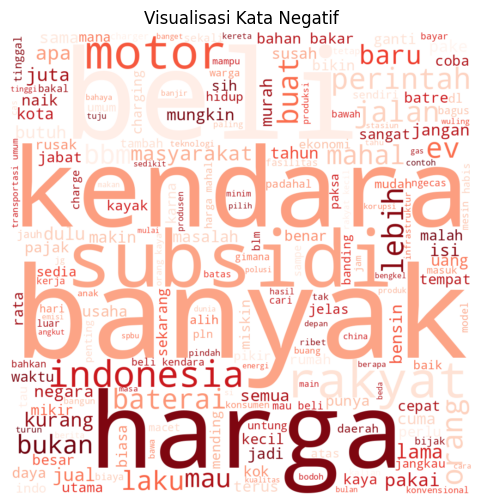

In [ ]:
all_text_s0 = ' '.join(word for word in data_negatif["text_cleaning"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Visualisasi Kata Negatif")
plt.margins(x=0, y=0)
plt.show()

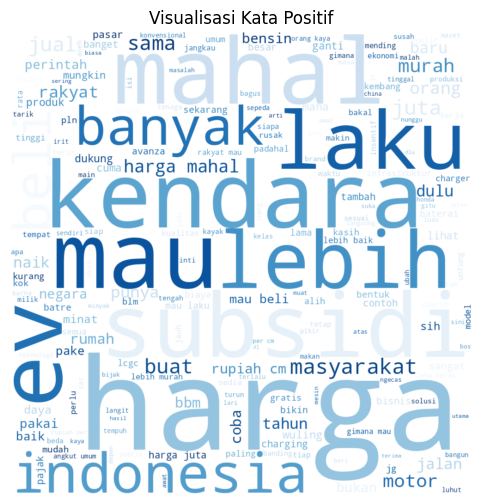

In [ ]:
all_text_s1 = ' '.join(word for word in data_positif["text_cleaning"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(9, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Visualisasi Kata Positif")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
data_clean['sentimen'].value_counts()

0    868
1    503
Name: sentimen, dtype: int64

In [ ]:
data_clean.head()

,text_cleaning,sentimen
0,saran sih bikin harga ionic sama kayak brio in...,1
1,masalah subsidi kualitas diturunin harga dinai...,0
2,baik kualitas kembang dulu baik kualitas motor...,1
3,model jelek kualitas buruk harga mahal croot,0
4,syarat sembarang woy anak muda punya rumah jad...,0


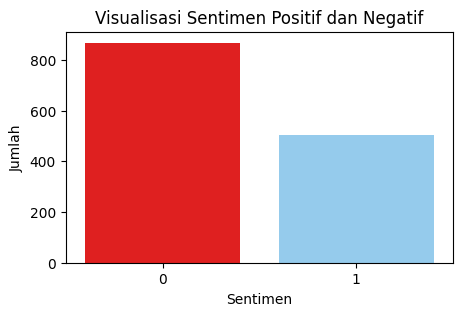

In [ ]:
# Visualisasi sentimen positif dan negatif
plt.figure(figsize=(5, 3))
sns.countplot(data=data_clean, x='sentimen', palette={0: "red", 1: "lightskyblue"})
plt.title('Visualisasi Sentimen Positif dan Negatif')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

## 4. Data Preparation

In [ ]:
# Memisahkan data menjadi data latih dan data uji
X = data_clean['text_cleaning']
y = data_clean['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [ ]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Melakukan oversampling menggunakan SMOTE pada data latih
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

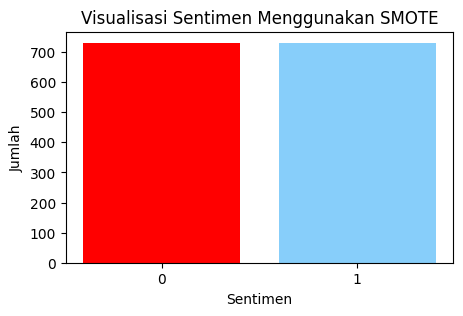

In [ ]:
# Contoh data hasil resampling (terserah Anda harus mengganti dengan data yang sesuai)
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize=(5, 3))
plt.bar(sentimen_counts.index, sentimen_counts.values, color=['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualisasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['0', '1'])
plt.show()

## 5. Modeling

In [ ]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [ ]:
y_pred = naive_bayes.predict(X_test_vec)

In [ ]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=['negatif', 'positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.7766990291262136

Laporan Klasifikasi :
               precision    recall  f1-score   support

     negatif       0.80      0.89      0.84       137
     positif       0.72      0.55      0.62        69

    accuracy                           0.78       206
   macro avg       0.76      0.72      0.73       206
weighted avg       0.77      0.78      0.77       206



## 6. Testing

In [ ]:
new_text = input("\nMasukkan teks baru: ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentiment_label = "positif"
elif predicted_sentimen[0] == 0:
    sentiment_label = "negatif"

print("Hasil Analisis Sentimen untuk Teks Baru :", sentiment_label)


Masukkan teks baru: mobilnya mudah rusak
Hasil Analisis Sentimen untuk Teks Baru : negatif
